In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score

/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
models_list = pd.read_csv('models_list.csv')

### Plot ROC Curves

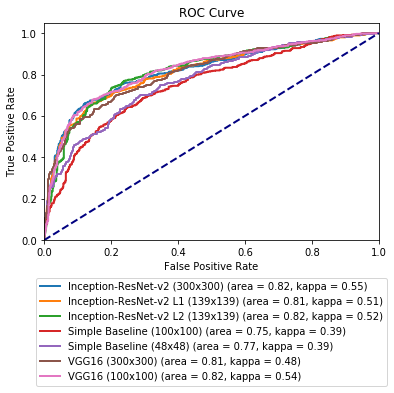

In [4]:
plt.figure()
lw = 2

for index, row in models_list.iterrows():
    
    model_name = row.Model_Name
    model_name_short = row.Model_Name_Short
    roc_curve_df = pd.read_csv('./roc_curve_data/' + model_name + '.csv')
    
    false_positive_rate = roc_curve_df.FalsePositive
    true_positive_rate = roc_curve_df.TruePositive
    auc = roc_curve_df.AUC[0]
    cohens_kappa = roc_curve_df.CohensKappa[0]

    plt.plot(false_positive_rate, true_positive_rate,
             lw=lw, label=model_name_short+' (area = %0.2f' % auc +', kappa = %0.2f)' % cohens_kappa)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
plt.show()

### Model ROC Curve

In [5]:
def plot_model_roc_curve(model_name):
    plt.figure()
    lw = 2
    
    model_name_short = models_list[models_list.Model_Name==model_name].Model_Name_Short.values[0]
    
    roc_curve_df = pd.read_csv('./roc_curve_data/roc_curve_' + model_name + '.csv')

    false_positive_rate = roc_curve_df.FalsePositive
    true_positive_rate = roc_curve_df.TruePositive
    auc = roc_curve_df.AUC[0]
    cohens_kappa = roc_curve_df.CohensKappa[0]

    plt.plot(false_positive_rate, true_positive_rate,
             lw=lw, label=model_name_short + ' (area = %0.2f' % auc +', kappa = %0.2f)' % cohens_kappa)

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - ' + model_name_short)
    pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
    plt.show()

### Calculate Site-wise Performance

In [6]:
def calc_sitewise_performance(model_name):
    
    plt.figure()
    lw = 2
    
    # Nice Site Names
    site_names_nice = {"XR_ELBOW":"Elbow"
                        ,"XR_FINGER": "Finger"
                        ,"XR_FOREARM": "Forearm"
                        ,"XR_HAND": "Hand"
                        ,"XR_HUMERUS": "Humerus"
                        ,"XR_SHOULDER": "Shoulder"
                        ,"XR_WRIST": "Wrist"}
    
    model_name_short = models_list[models_list.Model_Name==model_name].Model_Name_Short.values[0]
    
    studies_summary = pd.read_csv('./studies_summaries/'+model_name+'.csv')
    sites = studies_summary.groupby(["Site"], as_index=False).count()["Site"]
    site_list = list(sites)
    
    acc_list = []
    auc_list  = []
    kappa_list = []
    site_list_nice = []
    
    # Sitewise Results
    for site in site_list:
        site_name_nice = site_names_nice[site]
        site_list_nice.append(site_name_nice)
        
        num_studies = len(studies_summary[studies_summary.Site==site])
        pred_prob_abnormal = studies_summary[studies_summary.Site==site].PredProbAbnormal
        pred_labels = studies_summary[studies_summary.Site==site].PredLabel
        true_labels = studies_summary[studies_summary.Site==site].StudyOutcome
        
        acc = sum(true_labels==pred_labels)/num_studies
        auc = roc_auc_score(y_true=true_labels, y_score=pred_prob_abnormal)
        kappa = cohen_kappa_score(true_labels, pred_labels)
        
        # Plot ROC Curve
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=true_labels, y_score=pred_prob_abnormal)
        plt.plot(false_positive_rate, true_positive_rate,
                 lw=lw, label=site_name_nice+' (area = %0.2f' % auc +', kappa = %0.2f)' % kappa)        
        
        acc_list.append(acc)
        auc_list.append(auc)
        kappa_list.append(kappa)
        
    # Aggregate Results
    num_studies = len(studies_summary)
    pred_prob_abnormal = studies_summary.PredProbAbnormal
    pred_labels = studies_summary.PredLabel
    true_labels = studies_summary.StudyOutcome

    acc = sum(true_labels==pred_labels)/num_studies
    auc = roc_auc_score(y_true=true_labels, y_score=pred_prob_abnormal)
    kappa = cohen_kappa_score(true_labels, pred_labels)

    # Plot ROC Curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=true_labels, y_score=pred_prob_abnormal)
    plt.plot(false_positive_rate, true_positive_rate,
             lw=lw, label='All (area = %0.2f' % auc +', kappa = %0.2f)' % kappa)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve by Site - ' + model_name_short)
    pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
    plt.show()
    
    # Combine Results
    site_list_nice.append("All")
    acc_list.append(acc)
    auc_list.append(auc)
    kappa_list.append(kappa)
    
    # Put into a dataframe
    results_df = pd.DataFrame({'Site':site_list_nice
        , 'Accuracy':acc_list
        , 'AUC':auc_list
        , 'Kappa': kappa_list})
    
    return results_df


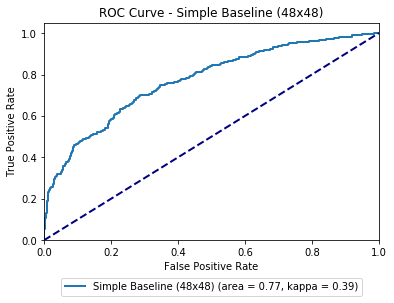

In [7]:
plot_model_roc_curve("VANILLA_MODEL_48_48")

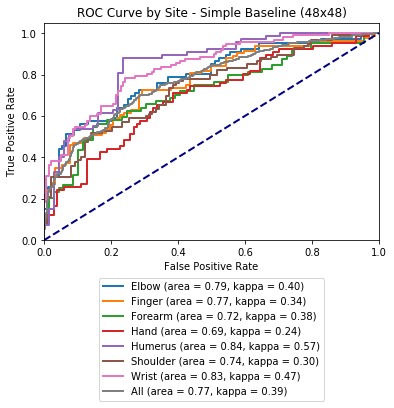

In [8]:
results = calc_sitewise_performance("VANILLA_MODEL_48_48")

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
results

,Site,Accuracy,AUC,Kappa
0,Elbow,0.71,0.79,0.40
1,Finger,0.67,0.77,0.34
2,Forearm,0.69,0.72,0.38
3,Hand,0.66,0.69,0.24
4,Humerus,0.79,0.84,0.57
5,Shoulder,0.65,0.74,0.30
6,Wrist,0.75,0.83,0.47
7,All,0.70,0.77,0.39


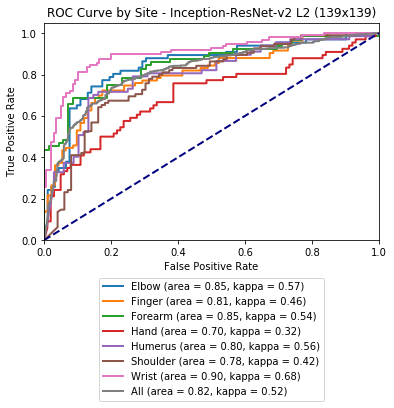

,Site,Accuracy,AUC,Kappa
0,Elbow,0.80,0.85,0.57
1,Finger,0.74,0.81,0.46
2,Forearm,0.77,0.85,0.54
3,Hand,0.70,0.70,0.32
4,Humerus,0.78,0.80,0.56
5,Shoulder,0.71,0.78,0.42
6,Wrist,0.85,0.90,0.68
7,All,0.77,0.82,0.52


In [11]:
calc_sitewise_performance("IRNV2_noweights_plateau_L2_139_139_e_25")

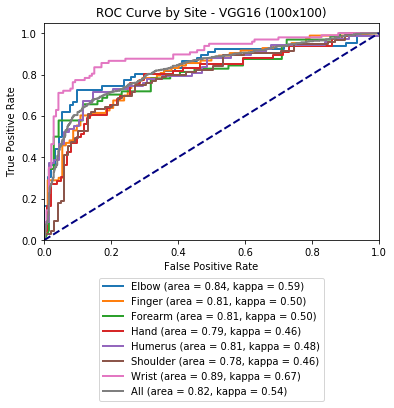

,Site,Accuracy,AUC,Kappa
0,Elbow,0.80,0.84,0.59
1,Finger,0.75,0.81,0.50
2,Forearm,0.75,0.81,0.50
3,Hand,0.75,0.79,0.46
4,Humerus,0.74,0.81,0.48
5,Shoulder,0.73,0.78,0.46
6,Wrist,0.84,0.89,0.67
7,All,0.77,0.82,0.54


In [13]:
calc_sitewise_performance("VGG16_noweights_lr_2E-4_plateau_100_100")